<a href="https://colab.research.google.com/github/mustafa1adel/Bank-Customer-Churn/blob/master/ChurnBank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##0.Loading the Dataset


In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


In [2]:

#load the data set
data = pd.read_excel("Churn-Modelling.xlsx")

#display first 5 rows 
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#1.Visualization 


1. Proportion of Customer churn.
2. Relation between 'Geography' and 'Exited'.
3. Relation between 'Gender' and 'Exited'.
4. Relation between 'HasCrCard' and 'Exited'.
5. Relation between 'IsActiveMember' and 'Exited'.
6. Relation between 'Age' and 'Exited'

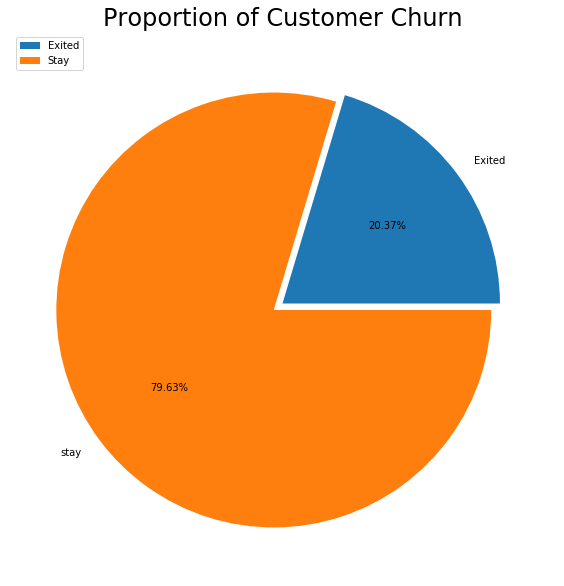

In [3]:
#Create a list that contains the number of exited customer and the 
ExitedAN = [data.Exited[data['Exited']==1].count(), data.Exited[data['Exited']==0].count()]

#set figure size and title
plt.subplots(figsize=(10, 10))
plt.title('Proportion of Customer Churn', size = 24)

#display the proportion of Customer Churn
plt.pie(ExitedAN,labels = ['Exited', 'stay'], autopct='%.2f%%', explode = (0 , 0.05))
plt.legend(labels = ['Exited', 'Stay'], loc = "upper left")
plt.show()


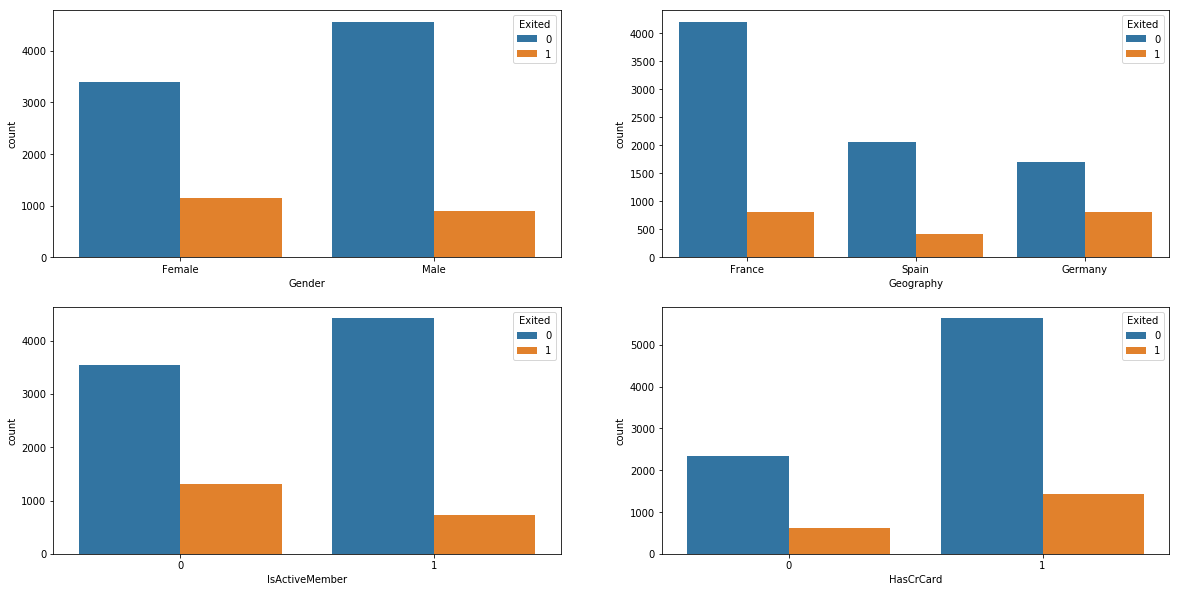

In [4]:
#set the figsize and number of subplts
fig, axarr = plt.subplots(2, 2, figsize=(20, 10))

#Relation between Gender and Exited
sns.countplot('Gender', hue = 'Exited',data = data, ax = axarr[0][0])

#Relation between Geography and Exited
sns.countplot('Geography', hue = 'Exited', data = data , ax = axarr[0][1])

#Relation between IsActiveMember and Exited
sns.countplot('IsActiveMember', hue = 'Exited', data = data , ax = axarr[1][0])

#Relation between HasCrCard and Exited
sns.countplot('HasCrCard', hue = 'Exited', data = data , ax = axarr[1][1])

/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:1270: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword arguments, some "


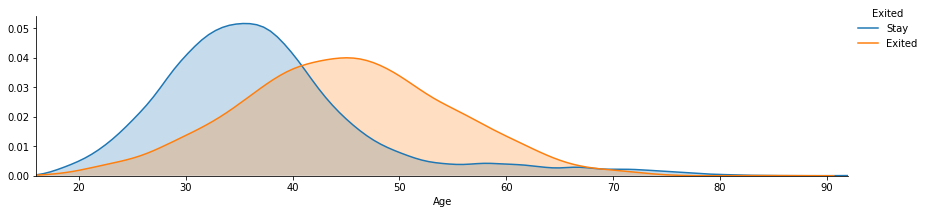

In [5]:
FacetGrid = sns.FacetGrid(data, hue='Exited', aspect=4)
FacetGrid.map(sns.kdeplot, 'Age', shade=True )
FacetGrid.set(xlim=(16, data['Age'].max()))
FacetGrid.add_legend(labels = ['Stay', "Exited"])

/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:1270: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword arguments, some "


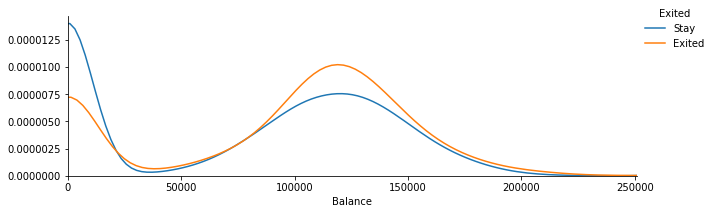

In [6]:
FacetGrid = sns.FacetGrid(data, hue='Exited', aspect=3)
FacetGrid.map(sns.kdeplot, 'Balance', shade=False )
FacetGrid.set(xlim=(data['Balance'].min(), data['Balance'].max()))
FacetGrid.add_legend(labels = ['Stay', "Exited"])

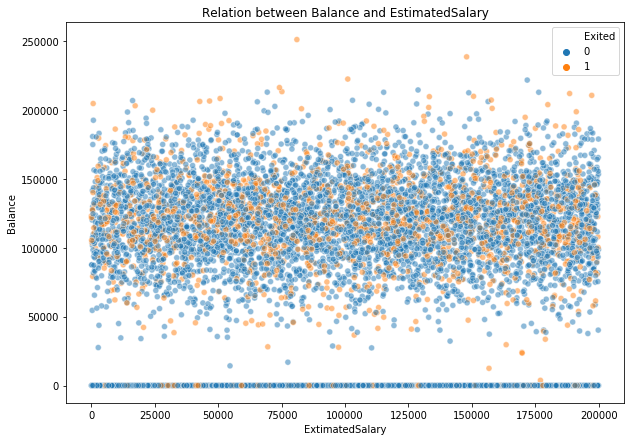

In [7]:
#IS there a relation between Balance and EstimatedSalary?

plt.subplots(figsize= (10,7))
plt.title("Relation between Balance and EstimatedSalary")
sns.scatterplot(x = data['EstimatedSalary'], y = data['Balance'], hue = data['Exited'], alpha = 0.5, color = 'red')
plt.xlabel('ExtimatedSalary')
plt.ylabel('Balance')
plt.show()

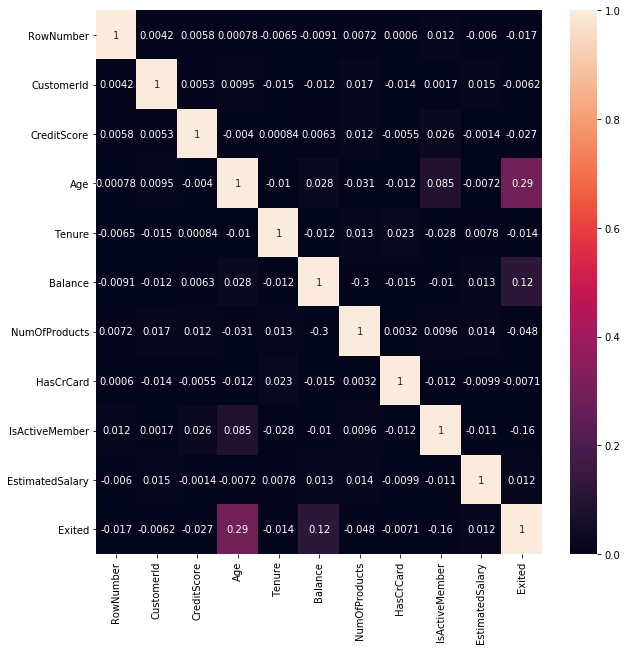

In [8]:
#Correlation between the numerical feature
corr = data.corr()

#set figure size 
plt.subplots(figsize=(10, 10))
#plot the 
ax = sns.heatmap(corr, vmin=0, vmax=1, annot=True)
plt.show()

###Notes:
  * Almost there's no correlation between CustomerId and Exited
  * Almost there's no correlation between HasCrCard and Exited  

#2.Pre-processing

In [9]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


###Data Cleaning

In [10]:
data = data.iloc[:,3:]
data.drop(['HasCrCard'], axis = 1, inplace = True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,79084.10,0


###One-hot encoding

In [11]:
data = pd.get_dummies(data = data ,columns=['Gender', 'Geography'])
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,79084.10,0,1,0,0,0,1


In [12]:
data.rename(columns={'Gender_Female':'Female',
                     'Gender_Male':'Male',
                     'Geography_France': 'France',
                     'Geography_Germany' : 'Germany',
                     'Geography_Spain':'Spain'}, inplace = True)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain
0,619,42,2,0.00,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,79084.10,0,1,0,0,0,1


###Data Normalization

In [13]:
#Using Simple scaling range 0:1

#new = old/max

data['CreditScore'] = data['CreditScore'] / data['CreditScore'].max()
data['Age'] = data['Age'] / data['Age'].max()
data['Tenure'] = data['Tenure'] / data['Tenure'].max()
data['Balance'] = data['Balance'] / data['Balance'].max() 
data['NumOfProducts'] = data['NumOfProducts'] / data['NumOfProducts'].max()
data['EstimatedSalary']  = data['EstimatedSalary'] / data['EstimatedSalary'].max()

data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain
0,0.728235,0.456522,0.2,0.000000,0.25,1,0.506763,1,1,0,1,0,0
1,0.715294,0.445652,0.1,0.334031,0.25,1,0.562734,0,1,0,0,0,1
2,0.590588,0.456522,0.8,0.636357,0.75,0,0.569679,1,1,0,1,0,0
3,0.822353,0.423913,0.1,0.000000,0.50,0,0.469151,0,1,0,1,0,0
4,1.000000,0.467391,0.2,0.500246,0.25,1,0.395435,0,1,0,0,0,1


###Shuffle and Split Data¶


In [0]:
# Split the data into features and target label
feature = data.drop(['Exited'], axis = 1)
target = data['Exited']

In [15]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature, 
                                                    target, 
                                                    test_size = 0.20, 
                                                    random_state = 200)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))


Training set has 8000 samples.
Testing set has 2000 samples.


#3 .Model Evaluating

In [17]:
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

#create an object
clf = GradientBoostingClassifier(random_state = 200)

#fit the model
clf.fit(X_train, y_train)

#predict
prediction_train = clf.predict(X_train)
prediction_test = clf.predict(X_test)

#calculate the accuracy
acc_train = accuracy_score(y_train, prediction_train)
acc_test = accuracy_score(y_test, prediction_test)

#calculate the f-beta score
f_train = fbeta_score(y_train, prediction_train, beta = 0.5)
f_test = fbeta_score(y_test, prediction_test, beta = 0.5)

#print the results
print("Training accuracy {:.2f}%".format(acc_train*100))
print("Testing accuracy {:.2f}%".format(acc_test*100))
print("")
print("Training f-score {:.4f}".format(f_train))
print("Testing f-score {:.4f}".format(f_test))


Training accuracy 87.84%
Testing accuracy 85.20%

Training f-score 0.7277
Testing f-score 0.6678
